In [2]:
#importing necessary libraries:
# common:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#for machine learning:
from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

In [3]:
df = pd.read_csv('adult.data')
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
                    'marital_status', 'occupation', 'relationship',
                    'race', 'sex', 'capital_gain', 'capital_loss',
                    'hours_per_week', 'native_country', 'income']
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
#print missing values
print("Nan in each columns:" , df.isna().sum(), sep='\n')

Nan in each columns:
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


In [5]:
df[df == '?'] = np.nan
for col in ['workclass', 'occupation', 'native_country']:
    df[col].fillna(df[col].mode()[0], inplace=True)
    
    
#creating binary column for income as >50K = 1, other 0.
for i in range(len(df)):
    if df['income'][i] == ' >50K':
        df['income'][i] = 1
    else:
        df['income'][i] = 0
df["income"] = df["income"].astype(int)

C:\anaconda\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)
C:\anaconda\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\anaconda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [6]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0


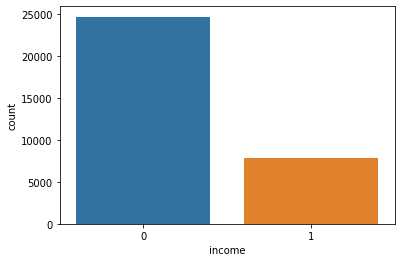

In [7]:
# Count of >50K & <=50K
sns.countplot(df['income'],label="Count")

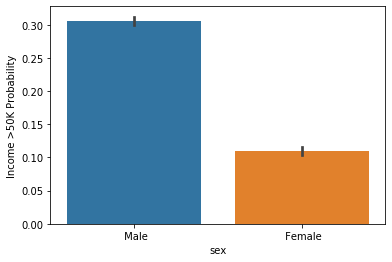

In [8]:
# Explore Sex vs Income
g = sns.barplot(x="sex",y="income",data=df)
g = g.set_ylabel("Income >50K Probability")

C:\anaconda\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\anaconda\lib\site-packages\seaborn\categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


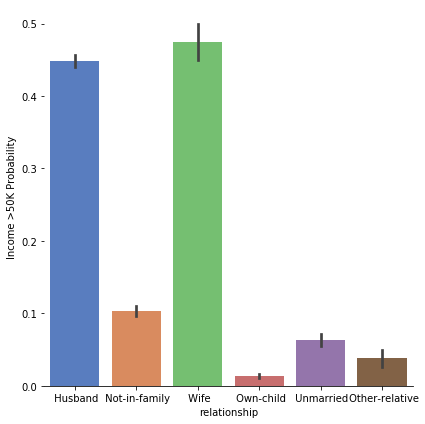

In [9]:
# Explore Relationship vs Income
g = sns.factorplot(x="relationship",y="income",data=df,kind="bar", size = 6 ,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")

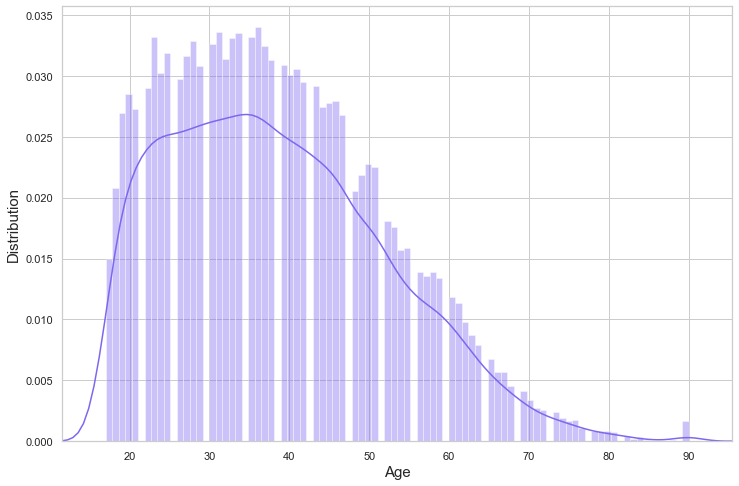

In [10]:
plt.rcParams['figure.figsize'] = [12, 8]
sns.set(style = 'whitegrid')

sns.distplot(df['age'], bins = 90, color = 'mediumslateblue')
plt.ylabel("Distribution", fontsize = 15)
plt.xlabel("Age", fontsize = 15)
plt.margins(x = 0)

C:\anaconda\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


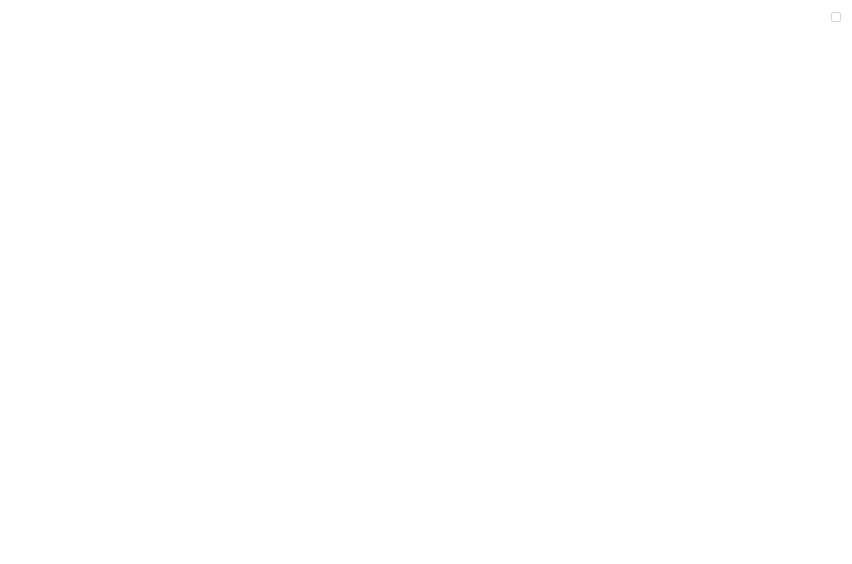

In [11]:
# Creating Pandas Series for the workclasses whose income is higher than 50K 
df_ = df.loc[df['income'] == '>50K',['workclass']]
workclass_types = df_['workclass'].value_counts()
labels = list(workclass_types.index)
aggregate = list(workclass_types)

# This Pie chat shows the Percentage of different workclass who earns more than 50K
plt.pie(aggregate, labels = labels, autopct='%1.2f%%', shadow=True)
plt.legend(labels, loc = 'best')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [12]:
#encoding cat data
le = preprocessing.LabelEncoder()
workclass_cat = le.fit_transform(df.workclass)
education_cat = le.fit_transform(df.education)
marital_cat   = le.fit_transform(df.marital_status)
occupation_cat = le.fit_transform(df.occupation)
relationship_cat = le.fit_transform(df.relationship)
race_cat = le.fit_transform(df.race)
sex_cat = le.fit_transform(df.sex)
native_country_cat = le.fit_transform(df.native_country)

df['workclass_cat'] = workclass_cat
df['education_cat'] = education_cat
df['marital_cat'] = marital_cat
df['occupation_cat'] = occupation_cat
df['relationship_cat'] = relationship_cat
df['race_cat'] = race_cat
df['sex_cat'] = sex_cat
df['native_country_cat'] = native_country_cat

#removing old columns
old_cols = ['workclass', 'education', 'marital_status', 
                  'occupation', 'relationship', 'race',
                  'sex', 'native_country']
df = df.drop(old_cols, axis = 1)

In [13]:
df = df.reindex(['age', 'workclass_cat', 'fnlwgt', 'education_cat',
                                    'education_num', 'marital_cat', 'occupation_cat',
                                    'relationship_cat', 'race_cat', 'sex_cat', 'capital_gain',
                                    'capital_loss', 'hours_per_week', 'native_country_cat', 
                                    'income'], axis= 1)

df.head(11)

,age,workclass_cat,fnlwgt,education_cat,education_num,marital_cat,occupation_cat,relationship_cat,race_cat,sex_cat,capital_gain,capital_loss,hours_per_week,native_country_cat,income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0
5,49,4,160187,6,5,3,8,1,2,0,0,0,16,23,0
6,52,6,209642,11,9,2,4,0,4,1,0,0,45,39,1
7,31,4,45781,12,14,4,10,1,4,0,14084,0,50,39,1
8,42,4,159449,9,13,2,4,0,4,1,5178,0,40,39,1
9,37,4,280464,15,10,2,4,0,2,1,0,0,80,39,1


In [14]:
num_features = ['age', 'workclass_cat', 'fnlwgt', 'education_cat', 'education_num',
                'marital_cat', 'occupation_cat', 'relationship_cat', 'race_cat',
                'sex_cat', 'capital_gain', 'capital_loss', 'hours_per_week',
                'native_country_cat']

scaled_features = {}
for each in num_features:
    mean, std = df[each].mean(), df[each].std()
    scaled_features[each] = [mean, std]
    df.loc[:, each] = (df[each] - mean)/std

In [15]:
df.head()

,age,workclass_cat,fnlwgt,education_cat,education_num,marital_cat,occupation_cat,relationship_cat,race_cat,sex_cat,capital_gain,capital_loss,hours_per_week,native_country_cat,income
0,0.837084,1.463861,-1.008726,-0.335438,1.134761,-0.406177,-0.608425,-0.900163,0.393668,0.703077,-0.145911,-0.21666,-2.222086,0.291569,0
1,-0.042640,0.090120,0.245043,0.181316,-0.420020,-1.733999,-0.135478,-0.277805,0.393668,0.703077,-0.145911,-0.21666,-0.035429,0.291569,0
2,1.057015,0.090120,0.425763,-2.402452,-1.197411,-0.406177,-0.135478,-0.900163,-1.962553,0.703077,-0.145911,-0.21666,-0.035429,0.291569,0
3,-0.775743,0.090120,1.408124,-0.335438,1.134761,-0.406177,0.810415,2.211624,-1.962553,-1.422276,-0.145911,-0.21666,-0.035429,-4.054094,0
4,-0.115950,0.090120,0.898156,0.439693,1.523457,-0.406177,-0.608425,2.211624,0.393668,-1.422276,-0.145911,-0.21666,-0.035429,0.291569,0


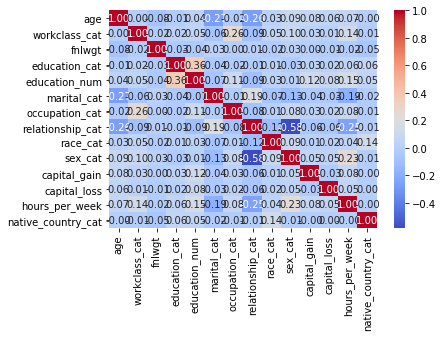

In [12]:
g = sns.heatmap(df[num_features].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

In [15]:
X = df.drop(["income"], axis=1)[num_features]
y = df["income"]

#---------------DEFINING MODELS AND IMPLEMENTING-----------------

# define models to test:
base_models = [("DecisionTree", DecisionTreeClassifier()),
               ("SupportVectorMachine", SVC()),
               ("KNN", KNeighborsClassifier()),
               ("NaiveBayes", GaussianNB()),
               ("NeuralNetwork", MLPClassifier()),
               ("RandomForest", RandomForestClassifier()),]

# split data into 'kfolds' parts for cross validation,
# use shuffle to ensure random distribution of data:
kfolds = 10 # 10 = 90% train, 10% validation
split = KFold(n_splits=kfolds, shuffle=True, random_state=42)

print("**************** Cross Fold Validation ****************")
# making predictions and scoring for every model:
for name, model in base_models:
    print(f"******** {name} ********")
    for score in ["accuracy", "precision", "recall", "f1"]:
        print(f"{score}:", end=" ")
        print(cross_val_score(model, X, y, cv=split, scoring=score, n_jobs=-1).mean())

**************** Cross Fold Validation ****************
******** DecisionTree ********
accuracy: 0.8097665847665848
precision: 0.5972925162153429
recall: 0.6248665023188109
f1: 0.6132751995459137
******** SupportVectorMachine ********
accuracy: 0.849140049140049
precision: 0.7584558121217035
recall: 0.5480182232290313
f1: 0.6362223756599203
******** KNN ********
accuracy: 0.8294533169533169
precision: 0.6645987156930038
recall: 0.5892302893553566
f1: 0.6244892822852175
******** NaiveBayes ********
accuracy: 0.8037776412776413
precision: 0.6888895011995745
recall: 0.33724337984019725
f1: 0.45260427927902896
******** NeuralNetwork ********
accuracy: 0.8500921375921375
precision: 0.718099887277148
recall: 0.5863424002558456
f1: 0.6573302311289623
******** RandomForest ********
accuracy: 0.8566031941031941
precision: 0.7417431890170139
recall: 0.624260622722157
f1: 0.6784477282286357


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

print("**************** Train - Test Split ****************")

DT = DecisionTreeClassifier()
model_1 = DT.fit(X_train, y_train)

# Predictions
pred_1 = model_1.predict(X_test)
print ("**********Decision Tree********")
print ("accuracy: ",accuracy_score(y_test, pred_1))
print("precision: ",precision_score(y_test, pred_1, average="binary"))
print("recall: ",recall_score(y_test, pred_1, average="binary"))
print ("f1: ", f1_score(y_test, pred_1, average = 'binary'))


SVM = SVC()
model_2 = SVM.fit(X_train, y_train)

# Predictions
pred_2 = model_2.predict(X_test)
print ("**********Support Vector Machine********")
print ("accuracy: ",accuracy_score(y_test, pred_2))
print("precision: ",precision_score(y_test, pred_2, average="binary"))
print("recall: ",recall_score(y_test, pred_2, average="binary"))
print ("f1: ", f1_score(y_test, pred_2, average = 'binary'))


KNN = KNeighborsClassifier()
model_3 = KNN.fit(X_train, y_train)

# Predictions
pred_3 = model_3.predict(X_test)
print ("********** KNN ********")
print ("accuracy: ",accuracy_score(y_test, pred_3))
print("precision: ",precision_score(y_test, pred_3, average="binary"))
print("recall: ",recall_score(y_test, pred_3, average="binary"))
print ("f1: ", f1_score(y_test, pred_3, average = 'binary'))



NB = GaussianNB()
model_4 = NB.fit(X_train, y_train)

# Predictions
pred_4 = model_4.predict(X_test)
print ("********** Naive Bayes ********")
print ("accuracy: ",accuracy_score(y_test, pred_4))
print("precision: ",precision_score(y_test, pred_4, average="binary"))
print("recall: ",recall_score(y_test, pred_4, average="binary"))
print ("f1: ", f1_score(y_test, pred_4, average = 'binary'))



NN = MLPClassifier()
model_5 = NN.fit(X_train, y_train)

# Predictions
pred_5 = model_5.predict(X_test)
print ("********** Neural Network ********")
print ("accuracy: ",accuracy_score(y_test, pred_5))
print("precision: ",precision_score(y_test, pred_5, average="binary"))
print("recall: ",recall_score(y_test, pred_5, average="binary"))
print ("f1: ", f1_score(y_test, pred_5, average = 'binary'))



RF = RandomForestClassifier()
model_6 = NN.fit(X_train, y_train)

# Predictions
pred_6 = model_6.predict(X_test)
print ("********** Random Forest ********")
print ("accuracy: ",accuracy_score(y_test, pred_6))
print("precision: ",precision_score(y_test, pred_6, average="binary"))
print("recall: ",recall_score(y_test, pred_6, average="binary"))
print ("f1: ", f1_score(y_test, pred_6, average = 'binary'))

**************** Train - Test Split ****************
**********Decision Tree********
accuracy:  0.8055896805896806
precision:  0.6053268765133172
recall:  0.6195786864931846
f1:  0.612369871402327
**********Support Vector Machine********
accuracy:  0.8482800982800983
precision:  0.7693631669535284
recall:  0.5539033457249071
f1:  0.6440922190201728
********** KNN ********
accuracy:  0.8273955773955773
precision:  0.6737588652482269
recall:  0.5885997521685254
f1:  0.6283068783068784
********** Naive Bayes ********
accuracy:  0.7976044226044227
precision:  0.6868686868686869
recall:  0.33705080545229243
f1:  0.4522028262676641


C:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


********** Neural Network ********
accuracy:  0.8467444717444718
precision:  0.7098092643051771
recall:  0.6456009913258984
f1:  0.6761842959117457
********** Random Forest ********
accuracy:  0.8452088452088452
precision:  0.7089655172413794
recall:  0.6369268897149938
f1:  0.6710182767624021


C:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [18]:
#Parameter tuning for each
print ("********** Parameter Tuning For Each Algorithm ********")

DT = DecisionTreeClassifier(criterion="entropy", max_depth=15, random_state=0)
print ("**********Decision Tree********")
for score in ["accuracy", "precision", "recall", "f1"]:
    print(f"{score}:", end=" ")
    print(cross_val_score(DT, X, y, cv=split, scoring=score, n_jobs=-1).mean())
    
    
SVM = SVC(kernel='rbf', C=2.0, random_state=42, degree=4,gamma='auto')
print ("**********Support Vector Machine********")
for score in ["accuracy", "precision", "recall", "f1"]:
    print(f"{score}:", end=" ")
    print(cross_val_score(SVM, X, y, cv=split, scoring=score, n_jobs=-1).mean())
    
    
KNN = KNeighborsClassifier(n_neighbors=15)
print ("********** KNN ********")
for score in ["accuracy", "precision", "recall", "f1"]:
    print(f"{score}:", end=" ")
    print(cross_val_score(KNN, X, y, cv=split, scoring=score, n_jobs=-1).mean())
    
    
NN = MLPClassifier(learning_rate='adaptive', max_iter= 250)
print ("********** Neural Network ********")
for score in ["accuracy", "precision", "recall", "f1"]:
    print(f"{score}:", end=" ")
    print(cross_val_score(NN, X, y, cv=split, scoring=score, n_jobs=-1).mean())
    
    
RF = RandomForestClassifier(criterion = 'entropy',n_estimators=150)
print ("********** Random Forest ********")
for score in ["accuracy", "precision", "recall", "f1"]:
    print(f"{score}:", end=" ")
    print(cross_val_score(RF, X, y, cv=split, scoring=score, n_jobs=-1).mean())

********** Parameter Tuning For Each Algorithm ********
**********Decision Tree********
accuracy: 0.845608108108108
precision: 0.7028097286251852
recall: 0.621822497782509
f1: 0.6597496451105554
**********Support Vector Machine********
accuracy: 0.8492936117936118
precision: 0.7568655524030322
recall: 0.5513526970406499
f1: 0.6378881563753387
********** KNN ********
accuracy: 0.8378378378378379
precision: 0.6964257297055385
recall: 0.5790636265458694
f1: 0.6323028323333968
********** Neural Network ********
accuracy: 0.8488636363636364
precision: 0.718753697131205
recall: 0.6109997460883694
f1: 0.6617371177802422
********** Random Forest ********
accuracy: 0.8580773955773955
precision: 0.741979834149982
recall: 0.6235718162783548
f1: 0.6789969053310123
